## Session 10 - Missing Value Imputation and Outlier Analysis

### Part 1 -  Missing Value imputation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
#Loading the data
import os
os.chdir("/Users/skywalker/Desktop/Praxis/ML")

fram = pd.read_csv("framingham.csv")
fram.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
#description of the data
fram.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### 1. The isnul() method

In [7]:
fram.head().isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
fram.sum()

male                 1820.00
age                210220.00
education            8185.00
currentSmoker        2095.00
cigsPerDay          37924.00
BPMeds                124.00
prevalentStroke        25.00
prevalentHyp         1317.00
diabetes              109.00
totChol            991771.00
sysBP              561183.50
diaBP              351486.50
BMI                108905.18
heartRate          321651.00
glucose            315724.00
TenYearCHD            644.00
dtype: float64

In [11]:
#Getting the number of missing values
fram.isnull().sum()


dtype('int64')

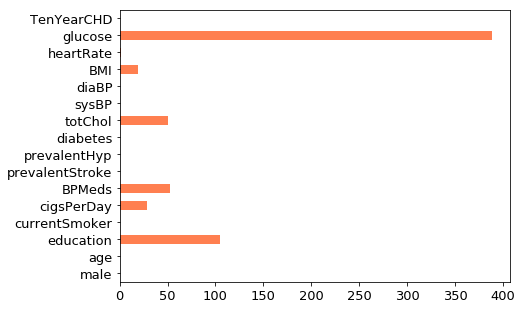

In [13]:
#Plotting the missing value information
miss = fram.isnull().sum()

miss.plot(kind = 'barh', figsize =(7,5), color = 'coral',fontsize=13)
plt.show()

In [17]:
#Getting the percentage of missing values
round((fram.isnull()).sum()/len(fram.index)*100,3)

In [21]:
#Only the variables that contains the missing values
perc = round((fram.isnull()).sum()/len(fram.index)*100,3)
perc.iloc[np.where(perc != 0)] # Or we can use perc[perc>0]

education     2.476
cigsPerDay    0.684
BPMeds        1.250
totChol       1.179
BMI           0.448
heartRate     0.024
glucose       9.151
dtype: float64

### 2. Complete Case Analysis

In [23]:
#Complete case considering all the variables
fram2 = fram.dropna()

In [24]:
fram2.shape

(3658, 16)

In [25]:
fram2.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [27]:
#Complete case considering a subset of variables
fram2 = fram.dropna(subset = ['totChol','BMI','glucose'])

In [28]:
fram2.shape

(3828, 16)

In [29]:
fram2.isnull().sum()

male                0
age                 0
education          95
currentSmoker       0
cigsPerDay         25
BPMeds             51
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           1
glucose             0
TenYearCHD          0
dtype: int64

### 3. Mean or Median Imputation

In [31]:
#The variables containing the missing values
# We replace the missing values by mean as this will not affect the mean
#We replace the missing values by median if there are many outliers
perc = round((fram.isnull()).sum()/len(fram.index)*100,3)
perc.iloc[np.where(perc != 0)] # Or we can use perc[perc>0]


education     2.476
cigsPerDay    0.684
BPMeds        1.250
totChol       1.179
BMI           0.448
heartRate     0.024
glucose       9.151
dtype: float64

In [54]:
fram3.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [53]:
#Making a copy of the data
fram3 = fram.copy()


In [55]:
#Mean of all the variables
fram3.mean()


male                 0.429245
age                 49.580189
education            1.979444
currentSmoker        0.494104
cigsPerDay           9.005937
BPMeds               0.029615
prevalentStroke      0.005896
prevalentHyp         0.310613
diabetes             0.025708
totChol            236.699523
sysBP              132.354599
diaBP               82.897759
BMI                 25.800801
heartRate           75.878981
glucose             81.963655
TenYearCHD           0.151887
dtype: float64

In [56]:
#Imputing the missing values in the variable age using the mean
#Mean of age
fram3.totChol[fram3.totChol.isnull()] = fram3.totChol.mean()
fram3.totChol

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       195.0
1       250.0
2       245.0
3       225.0
4       285.0
5       228.0
6       205.0
7       313.0
8       260.0
9       225.0
10      254.0
11      247.0
12      294.0
13      332.0
14      226.0
15      221.0
16      232.0
17      291.0
18      195.0
19      195.0
20      190.0
21      185.0
22      234.0
23      215.0
24      270.0
25      294.0
26      260.0
27      225.0
28      272.0
29      247.0
        ...  
4210    282.0
4211    245.0
4212    209.0
4213    193.0
4214    230.0
4215    236.0
4216    251.0
4217    266.0
4218    265.0
4219    204.0
4220    252.0
4221    260.0
4222    289.0
4223    287.0
4224    198.0
4225    216.0
4226    233.0
4227    187.0
4228    260.0
4229    251.0
4230    268.0
4231    187.0
4232    176.0
4233    313.0
4234    207.0
4235    248.0
4236    210.0
4237    269.0
4238    185.0
4239    196.0
Name: totChol, Length: 4240, dtype: float64

In [79]:
#Spotting the missing values in the variable age
fram3.totChol.isnull().sum()

0

In [ ]:
#Checking if the missing values got imputed


In [ ]:
#Re-checking the mean of the variable


In [ ]:
#Impute the missing values of the variable BMI with median (Do Yourself)





#### 4. Choosing Mean Imputation Vs Median Imputation

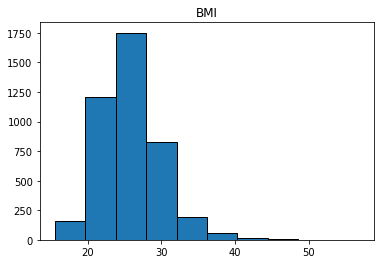

In [57]:
#Check the distribution of the variable - If highly skewed go for median
#Check the skewnss of variable, take the log and then check if it is symettrical, if Yes then impute the missing values by
#mean of log of missing values, then do exp of the log mean value to replace the original.

fram3.hist('BMI',grid = False,edgecolor = 'black')
plt.show()

In [59]:
#Taking the log transformation of the variable
fram3['logBMI'] = np.log(fram3.BMI)

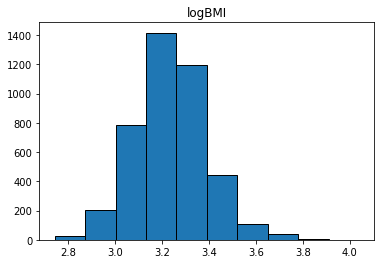

In [60]:
#Histogram of the log transformed variable
fram3.hist('logBMI',grid = False,edgecolor = 'black')
plt.show()

In [61]:
fram3.logBMI[fram3.logBMI.isnull()] = fram3.logBMI.mean()
fram3.logBMI

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0       3.294725
1       3.357942
2       3.232384
3       3.352707
4       3.139833
5       3.411148
6       3.499835
7       3.076390
8       3.271848
9       3.161670
10      3.131573
11      3.319264
12      3.269949
13      3.443938
14      3.106826
15      3.061052
16      3.107721
17      3.151881
18      3.145875
19      3.291383
20      3.072230
21      3.397524
22      3.531348
23      3.223266
24      3.089223
25      3.185526
26      3.280535
27      3.261552
28      3.490429
29      3.413126
          ...   
4210    3.306887
4211    3.109507
4212    3.371082
4213    3.328268
4214    3.207208
4215    3.667911
4216    3.099191
4217    3.228034
4218    3.292498
4219    3.107721
4220    3.053057
4221    3.084201
4222    3.284664
4223    3.076390
4224    3.228034
4225    3.188004
4226    3.260018
4227    3.243373
4228    3.776661
4229    3.242592
4230    3.130700
4231    3.217275
4232    3.141563
4233    3.256942
4234    2.981126
4235    3.091042
4236    2.952825
4237    3.0666

In [62]:
#Dropping logBMI
fram3.BMI=np.exp(fram3.logBMI)


In [64]:
fram3 = fram3.drop('logBMI',axis = 1)
fram3

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


#### 5. Imputation for Categorical Variable

In [67]:
#Mode imputation
#For categorical variables we need to check the most occuring variable
tab = pd.crosstab(fram3.education,columns='count')
tab

col_0,count
education,
1.0,1720
2.0,1253
3.0,689
4.0,473


In [77]:
#Impute the missing values by the most frequent value
fram3['education'][fram3['education'].isnull()] = 1

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Part B - Outlier Analysis

1. removing observations containing ouliers
2. Transformation
3. Winsorzation

In [5]:
fram['cigsPerDay'].isnull().sum()

29

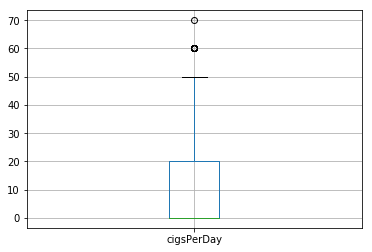

In [8]:
fram.boxplot(column = "cigsPerDay")
plt.show()

In [22]:
#fram3=fram.copy()
fram.cigsPerDay.describe()

count    4211.000000
mean        9.005937
std        11.922462
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64